
Portofolio : ['GLEN.L', 'MRW.L', 'AZN']
Sortino ratio : 68.18
Beta          : 0.51

Portofolio : ['LGEN.L', 'TSCO', 'GSK']
Sortino ratio : 40.49
Beta          : 0.55


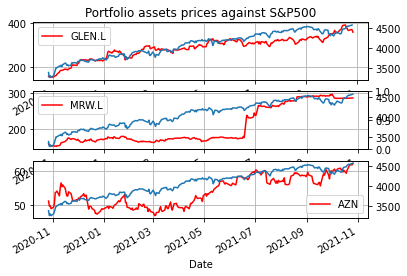

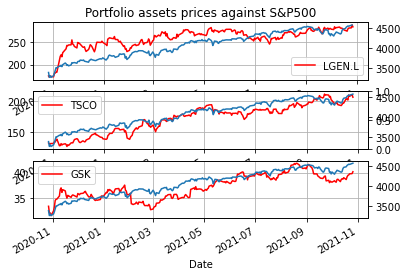

In [220]:
%matplotlib inline
import yfinance as yf
import pandas as pd 
from time import time
import numpy as np
import matplotlib.pyplot as plt

Rf = 0.0502 #SONIA 15/10/2021, Risk free rate

period = "1y"
#commenter le code!!!
#equally weighted assets
#start date modifiable
#len des portfolio modifiable
#vectorisation des calculs
#fonctionne sur 1 an pour la formule annualized return
#std_dr en journalier sinon impossible
port1_tickers = ["GLEN.L", "MRW.L", "AZN"]
port2_tickers = ["LGEN.L", "TSCO", "GSK"]

def sortino(portfolio, Rf):
    """
    Calculates the Sortino Ratio of a portfolio.
    Args:
        portfolio::[str]
            List of the tickers of the portfolio
        Rf::float
            Risk free rate
    Returns: 
        Sortino Ratio::float
            The Sortino ratio of the portfolio
    """
    data=yf.download(portfolio, period=period, progress=False) # pas de dropna ici pour pas discard de mauvaise ligne
    L_annual_return, L_asset_returns = [],[]
    for asset in portfolio : #for loop to facilement traiter les nan etc
        stock = data['Adj Close', asset].dropna().to_numpy()
        L_annual_return.append(stock[-1]/stock[0]-1)
        L_asset_returns.append(stock[1:]/stock[:-1]-1)
        
    Rp = np.mean(L_annual_return) 
    L_asset_returns = np.array([x for sublist in L_asset_returns for x in sublist]) #flatten
    std_dr = np.sqrt(np.sum(L_asset_returns[L_asset_returns<0]**2)/len(L_asset_returns))
    return round((Rp-Rf)/std_dr,2)

def beta(portfolio):
    #downloaded together each time to les nan là tkpt
    for asset in portfolio:
        data=yf.download([asset, '^GSPC'], period=period, progress=False)['Close'].dropna().to_numpy()
        cov_matrix = np.cov(np.transpose(data[1:,:]/data[:-1,]))
    return round(cov_matrix[0,1]/cov_matrix[1,1],2)

def plot_stocks(portfolio):
    """
    all in one psk que 3 mais si yen avait plus alors on ferait autrement
    """
    ticker_sp500 = yf.Ticker('^GSPC')
    df500 = ticker_sp500.history(period="1y")
    fig, ax = plt.subplots(len(portfolio))
    ax1=ax[1].twinx()
    for i, stock in enumerate(portfolio):
        ticker = yf.Ticker(stock)
        df = ticker.history(period="1y")
        df500['Close'].plot(ax=ax[i].twinx())
        df['Close'].plot(label=stock, c='r', ax=ax[i])
        ax[i].grid()
        ax[i].legend()
    ax[0].set_title("Portfolio assets prices against S&P500")

#Results:
for portfolio in (port1_tickers, port2_tickers):
    print(f"\nPortofolio : {portfolio}")
    print(f"Sortino ratio : {sortino(portfolio, Rf)}")
    print(f"Beta          : {beta(portfolio)}")
    plot_stocks(portfolio)